In [11]:
! pip install -r requirements.txt

INFO: pip is looking at multiple versions of tensorflow-intel to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)

The conflict is caused by:
    The user requested keras==3.2.1
    scikeras 0.13.0 depends on keras>=3.2.0
    tensorflow-intel 2.15.0 depends on keras<2.16 and >=2.15.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



ERROR: Cannot install -r requirements.txt (line 2), keras==3.2.1 and tensorflow-intel==2.15.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

def dataset(file_name:str = ''):
  return f'dataset/{file_name}'

In [2]:
import os

print(os.listdir(dataset()))

['corrected.gz', 'dataset.csv', 'dataset2.csv', 'kddcup.data.gz', 'kddcup.data_10_percent.gz', 'kddcup.names', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent.gz', 'training_attack_types', 'typo-correction.txt']


In [3]:
with open(dataset("kddcup.names"),'r') as f:
  names = f.read()
  features = [name.split(':')[0].strip() for name in names.split('.')][1:-1] + ['target']

len(features) , features

(42,
 ['duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_root',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'num_outbound_cmds',
  'is_host_login',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_srv_rate',
  'diff_srv_rate',
  'srv_diff_host_rate',
  'dst_host_count',
  'dst_host_srv_count',
  'dst_host_same_srv_rate',
  'dst_host_diff_srv_rate',
  'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate',
  'dst_host_serror_rate',
  'dst_host_srv_serror_rate',
  'dst_host_rerror_rate',
  'dst_host_srv_rerror_rate',
  'target'])

In [4]:
attack_types = {'normal': 'normal'}
with open(dataset("training_attack_types"),'r') as f:
  types = f.read()
  attack_types.update({t.split(' ')[0]: t.split(' ')[1] for t in types.split('\n')[:-2]})
len(attack_types), attack_types

(23,
 {'normal': 'normal',
  'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l'})

In [5]:
import pandas as pd

df = pd.read_csv(dataset('kddcup.data.gz'),names=features)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attack_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
df.shape

(4898431, 43)

In [6]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

target
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64


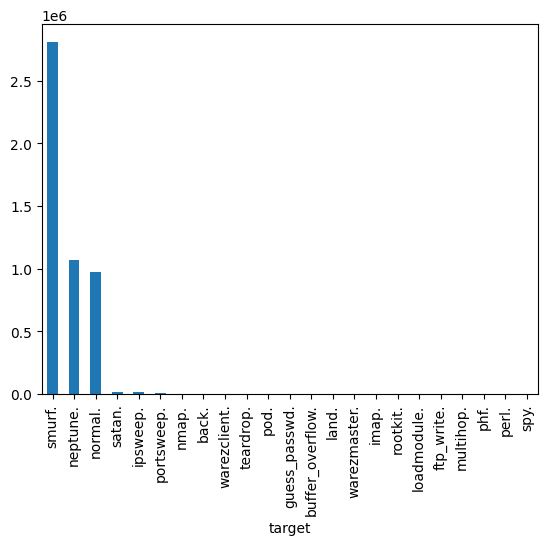

In [8]:
print(df['target'].value_counts())
bar_graph('target')

Attack Type
dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: count, dtype: int64


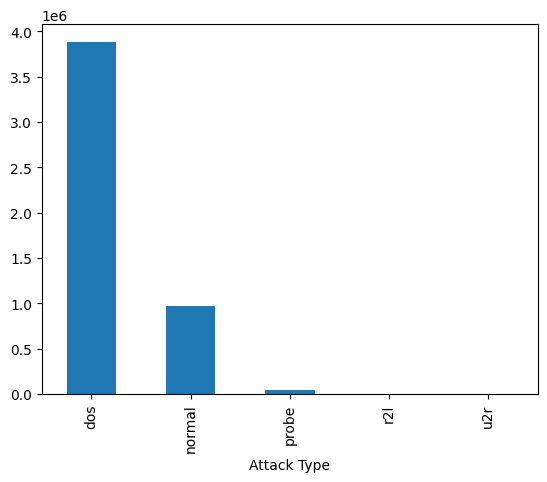

In [17]:
print(df['Attack Type'].value_counts())
bar_graph('Attack Type')

In [9]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'flag', 'service']

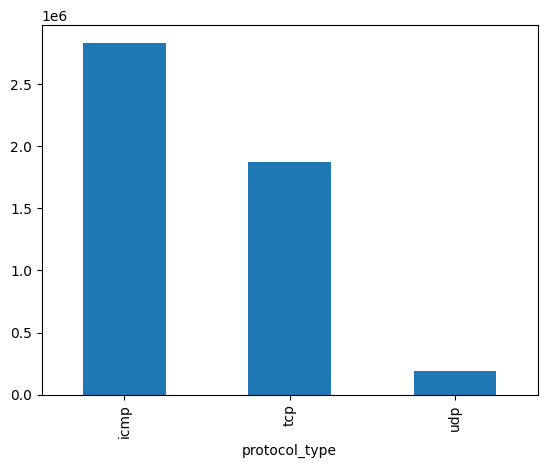

In [10]:
bar_graph('protocol_type')

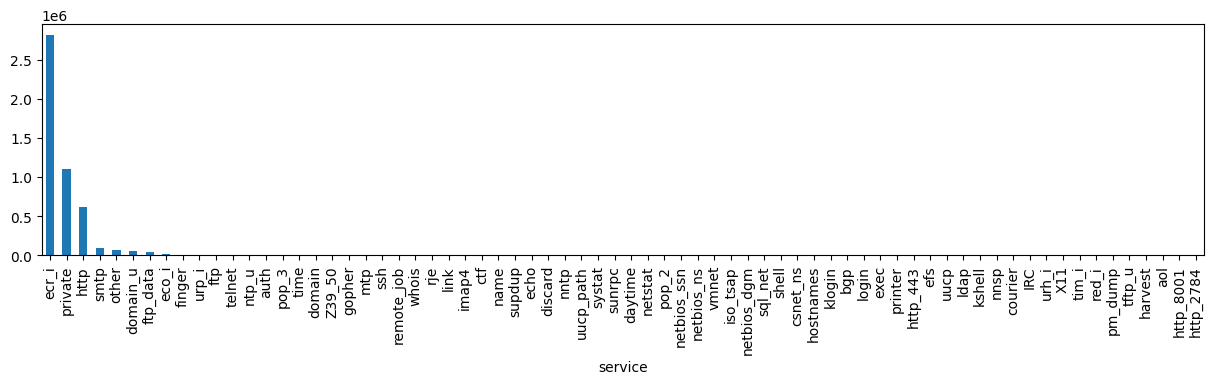

In [21]:
plt.figure(figsize=(15,3))
bar_graph('service')

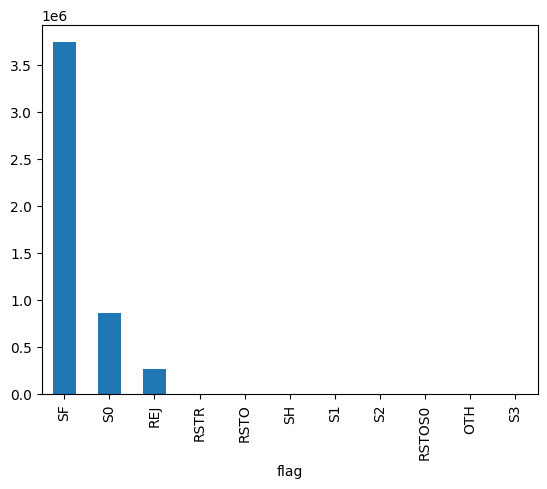

In [22]:
bar_graph('flag')

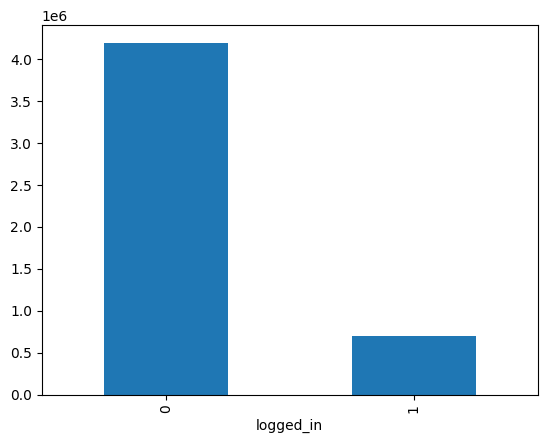

In [23]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

In [8]:
len(df.columns)

43

In [9]:
df = df.dropna(axis='columns')# drop columns with NaN

In [10]:
{col:df[col].nunique() for col in df}

{'duration': 9883,
 'protocol_type': 3,
 'service': 70,
 'flag': 11,
 'src_bytes': 7195,
 'dst_bytes': 21493,
 'land': 2,
 'wrong_fragment': 3,
 'urgent': 6,
 'hot': 30,
 'num_failed_logins': 6,
 'logged_in': 2,
 'num_compromised': 98,
 'root_shell': 2,
 'su_attempted': 3,
 'num_root': 93,
 'num_file_creations': 42,
 'num_shells': 3,
 'num_access_files': 10,
 'num_outbound_cmds': 1,
 'is_host_login': 2,
 'is_guest_login': 2,
 'count': 512,
 'srv_count': 512,
 'serror_rate': 96,
 'srv_serror_rate': 87,
 'rerror_rate': 89,
 'srv_rerror_rate': 76,
 'same_srv_rate': 101,
 'diff_srv_rate': 95,
 'srv_diff_host_rate': 72,
 'dst_host_count': 256,
 'dst_host_srv_count': 256,
 'dst_host_same_srv_rate': 101,
 'dst_host_diff_srv_rate': 101,
 'dst_host_same_src_port_rate': 101,
 'dst_host_srv_diff_host_rate': 76,
 'dst_host_serror_rate': 101,
 'dst_host_srv_serror_rate': 100,
 'dst_host_rerror_rate': 101,
 'dst_host_srv_rerror_rate': 101,
 'target': 23,
 'Attack Type': 5}

In [11]:
df = df[[col for col in df if df[col].nunique() > 1]]

In [12]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898430,0,tcp,http,SF,219,1098,0,0,0,0,...,1.0,0.0,0.14,0.05,0.0,0.01,0.0,0.0,normal.,normal


In [13]:
df['Attack Type']=df['Attack Type'].astype('category').cat.codes
df['protocol_type']=df['protocol_type'].astype('category').cat.codes
df['flag']=df['flag'].astype('category').cat.codes
df['service']=df['service'].astype('category').cat.codes
df['target']=df['target'].astype('category').cat.codes

# Corr

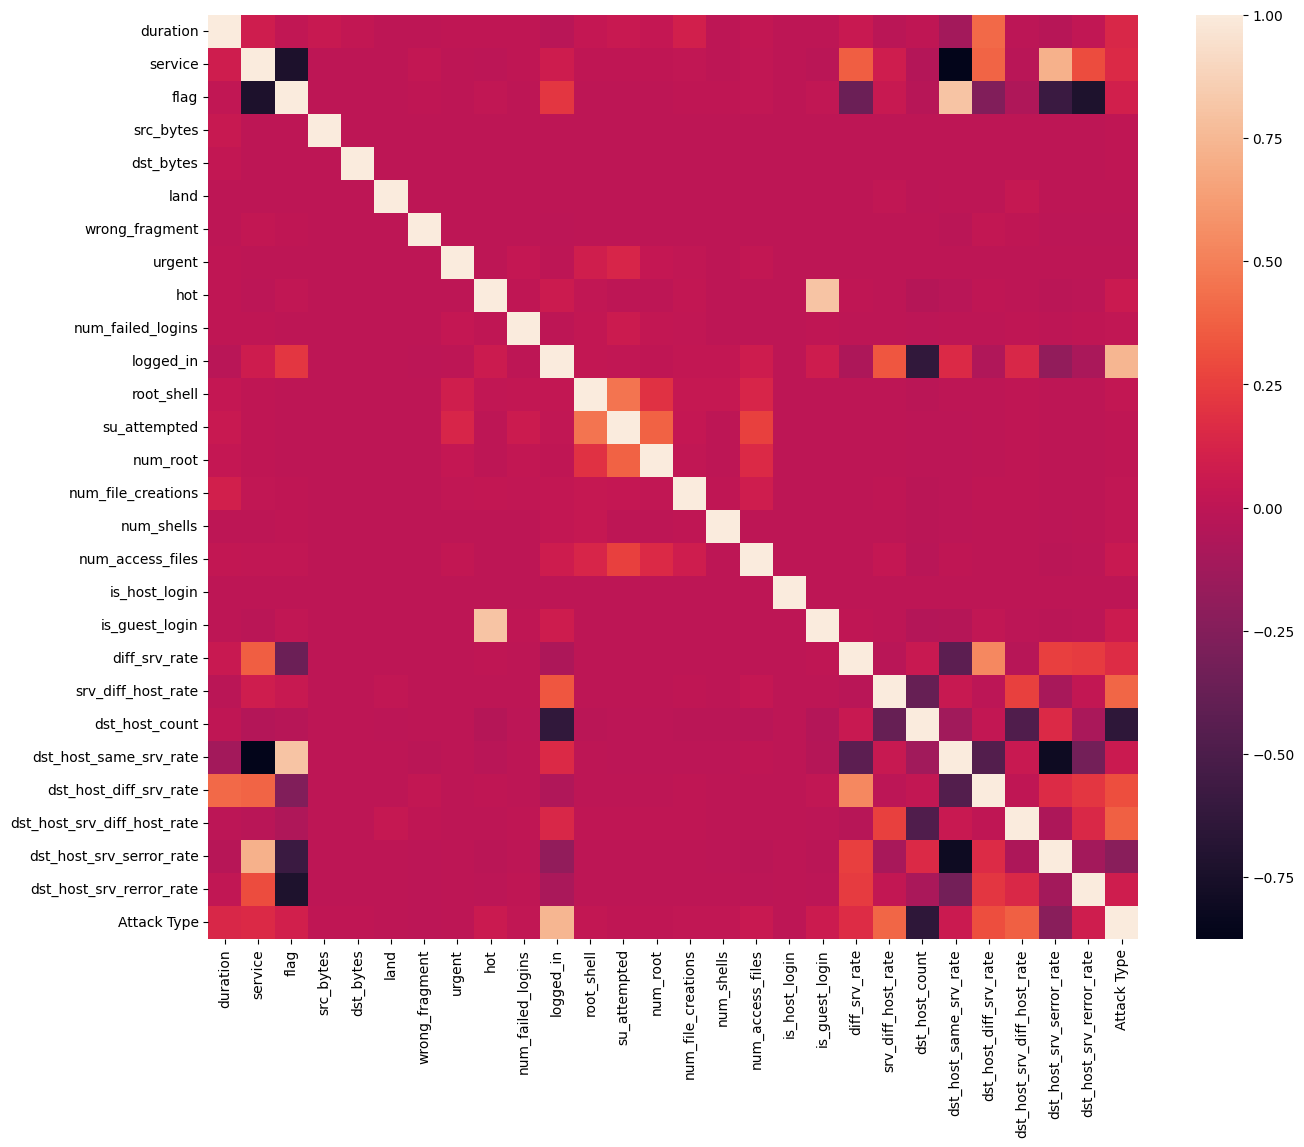

In [80]:
corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()


In [16]:
corr['target']

duration                      -0.051923
protocol_type                 -0.888373
service                       -0.842976
flag                           0.666173
src_bytes                      0.000315
dst_bytes                     -0.000789
land                          -0.004326
wrong_fragment                 0.018388
urgent                        -0.001129
hot                           -0.019846
num_failed_logins             -0.006773
logged_in                     -0.364081
num_compromised               -0.002170
root_shell                    -0.008382
su_attempted                  -0.003971
num_root                      -0.002909
num_file_creations            -0.008512
num_shells                    -0.007602
num_access_files              -0.025462
is_host_login                 -0.000565
is_guest_login                -0.020225
count                          0.883276
srv_count                      0.973083
serror_rate                   -0.639511
srv_serror_rate               -0.639054


In [17]:
df = df.drop(['Attack Type'], axis=1)

In [60]:
label_col = 'target'
threshold = 0.8

# Find features with correlation above the threshold
high_corr_features = corr[(corr > threshold) & (corr != 1)]

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
np.fill_diagonal(mask, True)
corr_matrix = corr.mask(mask)

# Set the threshold for high correlation
threshold = 0.9

# Find features with correlation above the threshold
high_corr_features = ((corr_matrix.abs() > threshold) & (corr_matrix != 1)).any()

# Identify and remove redundant features
to_drop = high_corr_features[high_corr_features].index
len(to_drop)
# Drop the redundant features from the DataFrame
df = df.drop(columns=to_drop)

In [79]:


print(df.shape)

for f,value in corr[label_col].items():
  if abs(value) > 0.6 and f!=label_col:
    df.drop(f,axis = 1, inplace=True)
    print('dropped', f)
df.shape

(4898431, 28)


KeyError: "['protocol_type'] not found in axis"

In [29]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [66]:
df['service'].corr(df[label_col])

-0.8429757842726632

In [67]:
df.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,24,9,215,45076,0,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,11,1
1,0,24,9,162,4528,0,0,0,0,0,...,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,11,1
2,0,24,9,236,1228,0,0,0,0,0,...,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,11,1
3,0,24,9,233,2032,0,0,0,0,0,...,0.0,0.0,3,1.0,0.0,0.0,0.0,0.0,11,1
4,0,24,9,239,486,0,0,0,0,0,...,0.0,0.0,4,1.0,0.0,0.0,0.0,0.0,11,1


In [68]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

is_host_login                       0.000639
land                                0.002391
urgent                              0.007215
num_failed_logins                   0.007299
su_attempted                        0.008082
root_shell                          0.008257
num_shells                          0.008738
is_guest_login                      0.028887
num_access_files                    0.035510
dst_host_srv_diff_host_rate         0.041260
wrong_fragment                      0.042854
diff_srv_rate                       0.082715
dst_host_diff_srv_rate              0.108543
num_file_creations                  0.124186
srv_diff_host_rate                  0.140560
dst_host_srv_rerror_rate            0.230978
logged_in                           0.350612
dst_host_srv_serror_rate            0.382177
dst_host_same_srv_rate              0.411186
Attack Type                         0.433234
hot                                 0.468978
flag                                2.256784
num_root  

In [ ]:
# todo service can be removed
df = df.drop(['service',], axis=1)

In [69]:
df.to_csv(dataset('dataset2.csv'), index=False)

# Load data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas

def dataset(file_name:str = ''):
  return f'dataset/{file_name}'

In [2]:
df = pandas.read_csv(dataset('dataset2.csv'))
df.shape

(4898431, 29)

In [7]:
df.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,is_host_login,is_guest_login,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
0,0,24,9,215,45076,0,0,0,0,0,...,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,0,24,9,162,4528,0,0,0,0,0,...,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0
2,0,24,9,236,1228,0,0,0,0,0,...,0,0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0
3,0,24,9,233,2032,0,0,0,0,0,...,0,0,0.0,0.0,3,1.0,0.0,0.0,0.0,0.0
4,0,24,9,239,486,0,0,0,0,0,...,0,0,0.0,0.0,4,1.0,0.0,0.0,0.0,0.0


In [6]:
# Target variable and train set
label_col = 'target'
df = df.drop(['Attack Type'], axis=1)
Y = df[[label_col]]
X = df.drop([label_col], axis=1)
df = df.drop([label_col], axis=1)

In [8]:
Y.groupby('target').count()

""
target
0
1
2
3
4
5
6
7
8


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=273)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3918744, 27) (3918744, 1)
(979687, 27) (979687, 1)


In [15]:
def fit(model):
  name = type(model).__name__
  start_time = time.time()
  model.fit(X_train, Y_train.values.ravel())
  end_time = time.time()
  print(f"{name}: Training time: ",end_time-start_time)

def fit_evaluate(model):
  name = type(model).__name__
  fit(model)

  start_time = time.time()
  Y_test_pred1 = model.predict(X_test)
  end_time = time.time()
  print(f"{name}: Testing time: ",end_time-start_time)

  print(f"{name}: Train score is:", model.score(X_train, Y_train))
  print(f"{name}: Test score is:", model.score(X_test,Y_test))


In [41]:
from sklearn.naive_bayes import GaussianNB
fit_evaluate(GaussianNB())

GaussianNB: Training time:  1.304124355316162
GaussianNB: Testing time:  3.498128652572632
GaussianNB: Train score is: 0.7972187006857299
GaussianNB: Test score is: 0.797020885241919


In [42]:
from sklearn.tree import DecisionTreeClassifier
fit_evaluate(DecisionTreeClassifier(criterion="entropy", max_depth = 6))

DecisionTreeClassifier: Training time:  4.370003938674927
DecisionTreeClassifier: Testing time:  0.09374427795410156
DecisionTreeClassifier: Train score is: 0.9980914803314531
DecisionTreeClassifier: Test score is: 0.9980003817545808


In [20]:
from sklearn.svm import SVC
fit_evaluate(SVC(gamma = 'scale'))

SVC: Training time:  45267.89551830292
SVC: Testing time:  1931.4255032539368
SVC: Train score is: 0.9979756268845323
SVC: Test score is: 0.9979187230207199


In [19]:
from sklearn.linear_model import LogisticRegression
fit_evaluate(LogisticRegression(max_iter=1200000))

LogisticRegression: Training time:  106.84966254234314
LogisticRegression: Testing time:  0.1562967300415039
LogisticRegression: Train score is: 0.9934708671962241
LogisticRegression: Test score is: 0.9933856425572657


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
fit_evaluate(GradientBoostingClassifier(random_state=220))

GradientBoostingClassifier: Training time:  10937.763447761536
GradientBoostingClassifier: Testing time:  23.19882106781006
GradientBoostingClassifier: Train score is: 0.9371566501920003
GradientBoostingClassifier: Test score is: 0.9371513554839453


In [17]:
from sklearn.ensemble import RandomForestClassifier
fit_evaluate(RandomForestClassifier(n_estimators=30))

RandomForestClassifier: Training time:  66.44297218322754
RandomForestClassifier: Testing time:  3.22806715965271
RandomForestClassifier: Train score is: 0.999711642301717
RandomForestClassifier: Test score is: 0.9996080380774676


In [16]:
from sklearn.ensemble import AdaBoostClassifier
fit_evaluate(AdaBoostClassifier(random_state=387))

c:\Users\rezaab\Projects\IntrusionDetection-KDD\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier: Training time:  202.76226043701172
AdaBoostClassifier: Testing time:  18.004950761795044
AdaBoostClassifier: Train score is: 0.7902184985801574
AdaBoostClassifier: Test score is: 0.7898757460290888


# NN

In [12]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from scikeras.wrappers import KerasClassifier
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy
import gc

keras.backend.clear_session()

try:
  del kerasModel
  gc.collect()
  del ann
  gc.collect()
except:
  pass

kerasModel = Sequential(
	[
		Input(shape=(27,)),
		Dense(27,activation = 'relu',kernel_initializer='random_uniform'),
		Dense(10,activation='sigmoid',kernel_initializer='random_uniform'),
		Dense(23,activation='softmax'),

	]
)

kerasModel.compile(optimizer = 'adam', loss='categorical_crossentropy',metrics = ['accuracy'])

kerasModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 27)             │           756 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │           253 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,289 (5.04 KB)

 Trainable params: 1,289 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from keras.utils import to_categorical

ann = KerasClassifier(model=kerasModel, epochs=10, batch_size=64)
Y_train_one_hot = to_categorical(Y_train, num_classes=23)
Y_test_one_hot = to_categorical(Y_test, num_classes=23)
start_time = time.time()
ann.fit(X_train, Y_train_one_hot)
end_time = time.time()
print(f"ANN: Training time: ",end_time-start_time)

ann_train_pred = ann.predict(X_train)
ann_test_pred = ann.predict(X_test)

ann_train_pred_scalar = np.argmax(ann_train_pred, axis=1)
ann_test_pred_scalar = np.argmax(ann_test_pred, axis=1)

print('Train accuracy:', accuracy_score(Y_train,ann_train_pred_scalar))
print('Test accuracy:', accuracy_score(Y_test,ann_test_pred_scalar))

Epoch 1/10
61231/61231 ━━━━━━━━━━━━━━━━━━━━ 22s 355us/step - accuracy: 0.9592 - loss: 0.1525
Epoch 2/10
61231/61231 ━━━━━━━━━━━━━━━━━━━━ 22s 362us/step - accuracy: 0.9965 - loss: 0.0169
Epoch 3/10
61231/61231 ━━━━━━━━━━━━━━━━━━━━ 25s 401us/step - accuracy: 0.9982 - loss: 0.0074
Epoch 4/10
61231/61231 ━━━━━━━━━━━━━━━━━━━━ 26s 423us/step - accuracy: 0.9986 - loss: 0.0058
Epoch 5/10
61231/61231 ━━━━━━━━━━━━━━━━━━━━ 26s 429us/step - accuracy: 0.9987 - loss: 0.0051
Epoch 6/10
61231/61231 ━━━━━━━━━━━━━━━━━━━━ 26s 421us/step - accuracy: 0.9988 - loss: 0.0048
Epoch 7/10
61231/61231 ━━━━━━━━━━━━━━━━━━━━ 26s 417us/step - accuracy: 0.9988 - loss: 0.0045
Epoch 8/10
61231/61231 ━━━━━━━━━━━━━━━━━━━━ 26s 424us/step - accuracy: 0.9989 - loss: 0.0041
Epoch 9/10
61231/61231 ━━━━━━━━━━━━━━━━━━━━ 27s 437us/step - accuracy: 0.9990 - loss: 0.0038
Epoch 10/10
61231/61231 ━━━━━━━━━━━━━━━━━━━━ 27s 437us/step - accuracy: 0.9990 - loss: 0.0038
ANN: Training time:  256.6343002319336
61231/61231 ━━━━━━━━━━━━━━━━━━